**What is MLR (Multiple Linear Regression)?**
- > Multiple Linear Regression is a type of statistical model used to predict the value of one variable (called the dependent variable) using two or more other variables (called independent variables).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Perform Exploratory Data Analysis (EDA)

In [2]:
# Load the dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
# Show first few rows
print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [4]:
# Summary info about data types and null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [5]:
# Summary statistics for numerical variables
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [6]:
# Check missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


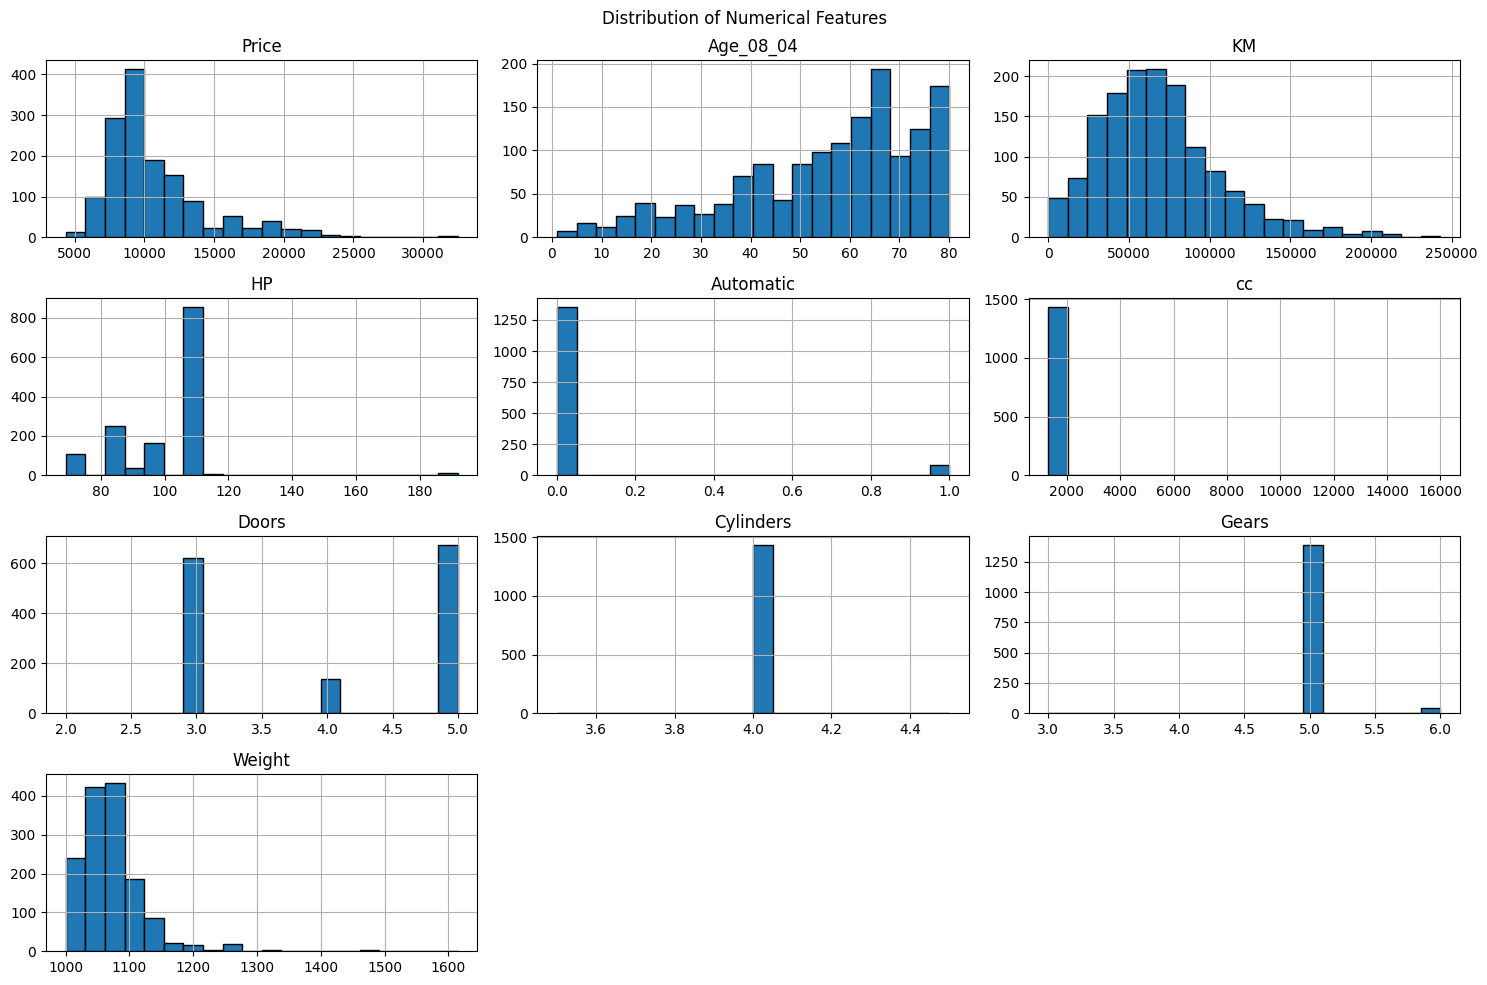

In [7]:
# Visualize distributions of numerical features
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

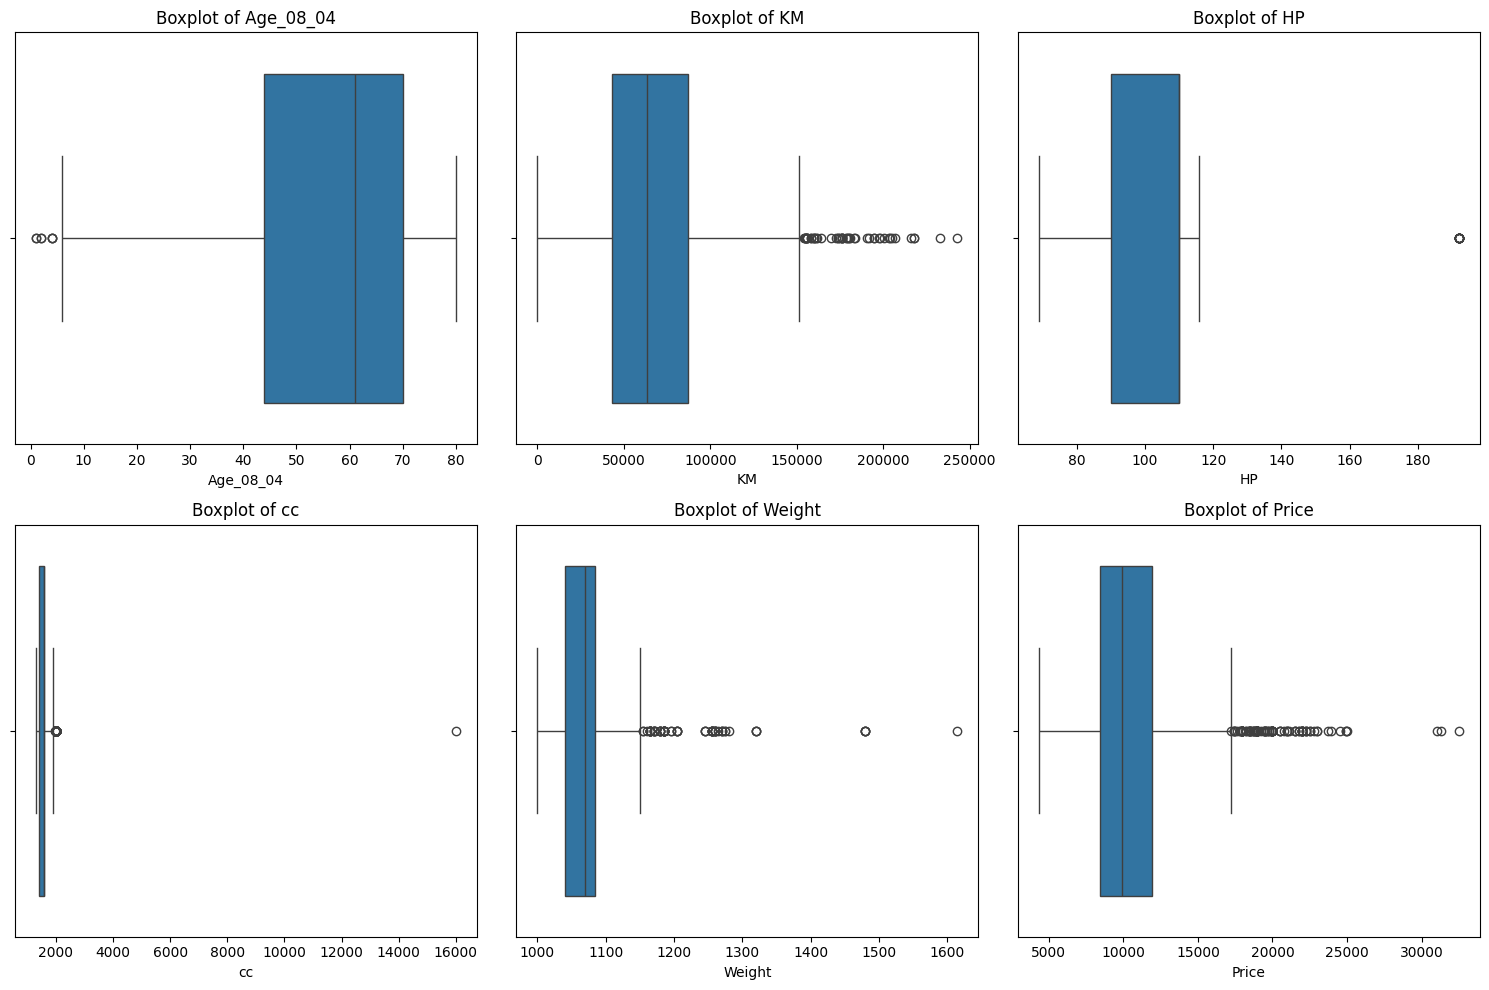

In [8]:
# Boxplots to check for outliers
# Numerical columns to plot
num_cols = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']

# Set up the subplot grid (3 columns x 2 rows)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily loop through

# Plot each boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

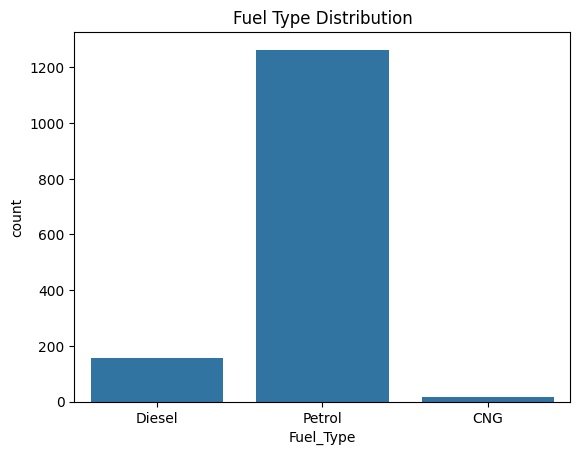

In [9]:
# Countplot for Fuel Type
sns.countplot(data=df, x='Fuel_Type')
plt.title("Fuel Type Distribution")
plt.show()

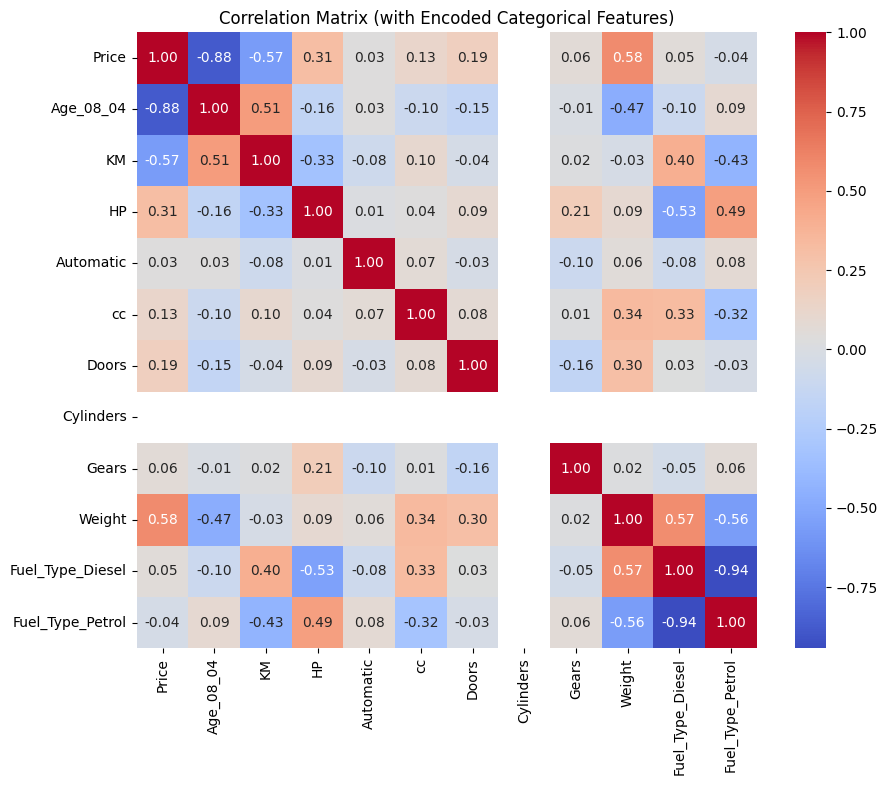

In [22]:
# Correlation Heatmap
# Encode categorical column before correlation
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Now get correlation only on numeric values
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (with Encoded Categorical Features)")
plt.show()

**Step 2: Data Preprocessing for MLR**

In [16]:
# One-hot encode FuelType (drop_first avoids dummy variable trap)
# df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [17]:
# Drop non-informative columns if they exist (e.g., ID, Model)
df_encoded.drop(columns=['Model', 'ID'], errors='ignore', inplace=True)

In [18]:
# Define features (X) and target (y)
X = df_encoded.drop(columns='Price') # X: All columns except 'Price' → used as input features.
y = df_encoded['Price'] # y: Only the 'Price' column → used as the prediction target.

**Step 3: Split the Dataset into Training and Testing Sets**

In [24]:
from sklearn.model_selection import train_test_split

# Split 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1148, 11)
X_test shape: (288, 11)


**Step 4: Build and Interpret Multiple Linear Regression Models**

In [25]:
# Model 1: Using All Features
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

# Print coefficients
coef1 = pd.Series(model1.coef_, index=X_train.columns)
print("Model 1 Coefficients:\n", coef1)

Model 1 Coefficients:
 Age_08_04          -1.208305e+02
KM                 -1.623141e-02
HP                  1.403948e+01
Automatic           1.488309e+02
cc                 -3.037219e-02
Doors              -6.031097e+01
Cylinders          -1.620037e-12
Gears               5.516007e+02
Weight              2.588496e+01
Fuel_Type_Diesel   -6.854876e+01
Fuel_Type_Petrol    1.370809e+03
dtype: float64


In [28]:
# Model 2: Reduced Model (Manually Selected Features)
# Select a few relevant features based on EDA/correlation
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']

model2 = LinearRegression()
model2.fit(X_train[selected_features], y_train)

coef2 = pd.Series(model2.coef_, index=selected_features)
print("Model 2 Coefficients:\n", coef2)

Model 2 Coefficients:
 Age_08_04           -120.665034
KM                    -0.016237
HP                    16.258363
Weight                25.257766
Fuel_Type_Diesel      54.190978
Fuel_Type_Petrol    1419.662714
dtype: float64


In [30]:
#Model 3: Model with Interaction Term (Age_08_04  × KM)
# Add interaction term
X_train_interact = X_train.copy()
X_test_interact = X_test.copy()
X_train_interact['Age_KM'] = X_train['Age_08_04'] * X_train['KM']
X_test_interact['Age_KM'] = X_test['Age_08_04'] * X_test['KM']

model3 = LinearRegression()
model3.fit(X_train_interact, y_train)

coef3 = pd.Series(model3.coef_, index=X_train_interact.columns)
print("Model 3 Coefficients:\n", coef3)

Model 3 Coefficients:
 Age_08_04          -1.494634e+02
KM                 -5.107942e-02
HP                  1.837156e+01
Automatic           2.568033e+02
cc                 -5.091169e-02
Doors              -4.421378e+01
Cylinders          -8.526513e-14
Gears               6.197791e+02
Weight              2.246743e+01
Fuel_Type_Diesel    1.657138e+02
Fuel_Type_Petrol    1.069231e+03
Age_KM              5.689136e-04
dtype: float64


**Step 5: Evaluate All Models Using Metrics**

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define function to evaluate
def evaluate_model(name, model, X, y_true):
    y_pred = model.predict(X)
    return {
        'Model': name,
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Collect evaluations
eval_results = [
    evaluate_model("Model 1 (All)", model1, X_test, y_test),
    evaluate_model("Model 2 (Reduced)", model2, X_test[selected_features], y_test),
    evaluate_model("Model 3 (Interaction)", model3, X_test_interact, y_test),
]

# Show results
eval_df = pd.DataFrame(eval_results)
print(eval_df)

                   Model        R2          MAE         RMSE
0          Model 1 (All)  0.834889   990.887274  1484.265415
1      Model 2 (Reduced)  0.833909  1001.276968  1488.664046
2  Model 3 (Interaction)  0.862166   940.792132  1356.131783


In [34]:
# Step 6: Apply Lasso and Ridge Regularization
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Lasso with StandardScaler
lasso = make_pipeline(StandardScaler(), Lasso(alpha=1.0))
lasso.fit(X_train, y_train)
eval_lasso = evaluate_model("Lasso", lasso, X_test, y_test)

# Ridge with StandardScaler
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge.fit(X_train, y_train)
eval_ridge = evaluate_model("Ridge", ridge, X_test, y_test)

# Combine with earlier results
#eval_all = eval_df.append([eval_lasso, eval_ridge], ignore_index=True) -> As of Pandas version 2.0, the .append() method for DataFrames has been removed, as it was officially deprecated in version 1.4.0.
eval_all = pd.concat([eval_df, pd.DataFrame([eval_lasso, eval_ridge])], ignore_index=True)
#show result
print(eval_all)

                   Model        R2          MAE         RMSE
0          Model 1 (All)  0.834889   990.887274  1484.265415
1      Model 2 (Reduced)  0.833909  1001.276968  1488.664046
2  Model 3 (Interaction)  0.862166   940.792132  1356.131783
3                  Lasso  0.835118   991.017466  1483.235687
4                  Ridge  0.835046   990.859177  1483.557506


**Model Performance Summary**

**Metric_______________________________________________Best Model**

R² (Explained Variance) -- > Model 3 (Interaction) with 0.862 — highest predictive power.

MAE (Mean Absolute Error) -- > Model 3 (Interaction) with 940.79 — lowest average error.

RMSE (Root Mean Squared Error) -- > Model 3 (Interaction) with 1356.13 — lowest overall error magnitude.

**Key Insights:**

Model 3 (Interaction) performs best across all metrics, suggesting that interaction terms improve model accuracy significantly.

Lasso and Ridge perform similarly to Model 1, indicating no major improvement through regularization in this case.

Model 2 (Reduced) shows slightly lower performance, likely due to loss of important features.

**Conclusion:**

Model 3 (Interaction) is the most effective and should be the preferred choice if interpretability and computational cost are manageable.

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------

**Interview Questions:**

**1.What is Normalization & Standardization and how is it helpful?**

--> Normalization and Standardization is crucial in data preprocessing, especially for machine learning and statistical modeling.

1. Normalization (Min-Max Scaling)

   Definition:-->  Rescales the data to a fixed range, typically [0, 1].

   Formula:

    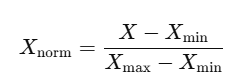

    **Use When:**

    1.You want to preserve the shape of the original distribution.

    2.Your model is sensitive to absolute scales, e.g., KNN, Neural Networks.

    3.Features have different units (e.g., km, kg, dollars).

2. Standardization (Z-score Normalization)

   Definition:--> Rescales data to have mean = 0 and standard deviation = 1.

   Formula:

   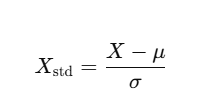


    Use When:

    1.Your data has outliers (less sensitive than normalization).

    2.Features have different means and variances.

    3.Algorithms assume normal distribution, e.g., Linear Regression, Logistic Regression, SVM, PCA.

Why It's Helpful

    1.Improves Model Performance:

    - > Many ML models (like gradient descent-based ones) converge faster and more accurately on scaled data.

    2.Removes Bias from Feature Scales:

    --> Without scaling, larger scale features dominate smaller ones (e.g., salary vs. age).

    3.Required by Distance-Based Algorithms:

    --> Algorithms like KNN, K-Means, SVM, etc., use distance metrics that get distorted if features are not scaled.

    4.Prevents Numerical Instability:

    --> Some optimization algorithms behave poorly on unscaled data due to very large/small values.

**2.What techniques can be used to address multicollinearity in multiple linear regression?**

--> Multicollinearity occurs when independent variables are highly correlated with each other, which can make regression coefficients unstable and hard to interpret.


**Problems Caused by Multicollinearity**


*   Unreliable p-values.
*   List item
*   Difficulty in identifying the true effect of each predictor.
*   Model becomes sensitive to small changes in data.

✅ **Techniques to Handle Multicollinearity**
1. Remove One of the Correlated Variables

*   If two or more variables are highly correlated (e.g., correlation > 0.9), drop one.
*   Use df.corr() or a correlation heatmap to identify.

2. Use Principal Component Analysis (PCA)

*   Transforms correlated features into uncorrelated principal components.
*   Reduces dimensionality while retaining most information.
*   ⚠️ Downside: Less interpretability.

3. Apply Regularization (Ridge or Lasso Regression)
*   Ridge Regression (L2): Shrinks coefficients, especially of correlated variables.
*   Lasso Regression (L1): Can shrink some coefficients to zero (feature selection).
*   These help stabilize the model and reduce overfitting.

4. Check Variance Inflation Factor (VIF)


*   VIF quantifies how much a variable is inflated due to multicollinearity.

*   Threshold:

    VIF > 5 or 10 → problematic

    Solution: Drop or combine high-VIF variables.

    from statsmodels.stats.outliers_influence import variance_inflation_factor

5. Combine Correlated Variables

*   Create a new feature by averaging or adding highly correlated variables.
*   Useful when both features are important but hard to distinguish.

6. Center the Variables (Mean-Centering)

*   Subtract mean from each feature.
*   Especially useful when using interaction terms, which can introduce multicollinearity.

Thank you! ☺️